# Shrinkkage Methods
## Principal Components 

* If $X$-matrix is orthogonal then testing interpretation a greatly simplified
* Principal  components (PCs) rotate the $X$ to orthogonality
* If the two predictors are correlated is clearly orthogonal $X$-matrix and it will impose great difficulties to $x_1$ and $x_2$ on the response
* Suppose that we rotate the axis so that the predictors are now orthogonal
*  The rotated directos $z_1$ and $z_2$ in our two predictor example are simple linear combinations of the original predictors
* We wish to rotate $p x p$ matrix $U$ such that $Z=XU$ and $Z^TZ=diag(\lambda_1, ..., \lambda_p)$ and $\lambda_1 \geq \lambda_2 \geq, ... \lambda_p 0$

* A eigenvalue zero indicate nonidentifiabily

<p>&nbsp;</p>
\begin{split}
Z^TZ = X^TX^TXU
\end{split}
<p>&nbsp;</p>

##### Eigenvalues and eigenvectors

The eigenvalues of  $X^TX$ are $\lambda_1, ..., \lambda_p$ and the eigenvectors of $X^TX$ are the columns of $U$

The columns of $Z$ are called PCs and these are orthogonal to each other.

$\lambda_i$ of $Z$ is the variance of $Z_i$

#####  Alternatively 
We can find linear combinations of $X$ that have maximum variation

* Finding $u_1$ such that $var(u_1^TX)$ is maximumed subjected to $u_1^Tu_1=1$, and find $var(u_2^TX)$ is maximized subjected to $u_1^Tu_2=0$ and $u_2^Tu_2=1$

#####  Common variations

1)  Use an $X$ with the intercept **or** center each variable by its mean (without the intercept). The second choice is more common given that the PCs are just linear combinations of predictors without a constant

2) As we center the variables, we can also standardize it by SD. This is the equivalent of doing PCA on a correlation matrix of predictors. This option makes sense when the predictors are measured in different scale. If no scaling is implementes, PCs will be dominated by predictor with the greatest values

* PCA is mostly used for dimension reduction, and not designed for regression
* Only fez eigenvalues will be large so that almost all the variation in $X$. We can select $Z$ with only the first few columns

<p>&nbsp;</p>
\begin{split}
y \sim Z
\end{split}
<p>&nbsp;</p>

##### Principal components regression (PCR)

Used in two distinct ways:

1) **Explanation**: when the goal is to find a simple,  well-fitting and understandable model for the response

2) **Prediction**: It can might be the case that we can make better prediction with a few $Z$ than lots of $X$. But all dependens on choosing the right choice of number of PCs

##### Example

* Tecator Infratec Food and Feed Analyzer work in 850-1050 nm 
* A total of 250 samples were measured
* One of the goal is to build a model to estimate fat contant using the 100 channel spectrum of absorbances as predictors (p = 100)
* The true performance of any model is hard to determine based on jjust the fit to the available data
* To solve that, we can partition the data in two parts—a training sample n=172—, and a testing samples n=43

In [2]:
library(faraway)

### Using the full model

In [3]:
data(meatspec)
model1 = lm(fat ~ ., meatspec[1:172,])
summary(model1)$r.squared

[1] 0.9970196

* The fit interms of $R^2$ is very good
* Now let's test its performance using the root mean square error (RMSE) as a measure


<p>&nbsp;</p>
\begin{split}
\sqrt{\sum_{i=1}^n \frac{\hat y_i - y_i)^2}{n}}
\end{split}
<p>&nbsp;</p>


In [92]:
rmse = function(x, y) sqrt(mean((x-y)^2))
rmse(model1$fit, meatspec$fat [1:172])

[1] 0.6903167

In [5]:
rmse(predict(model1, meatspec [173:215,]), meatspec$fat[173:215])

[1] 3.814

* The performance is much worse for the test sample, and that is not unusual
* The actual error is 5x higher predicted
* Perhaps, it is quite likely that not all 100 predictors are necessary  to make a good prediction

### Using the stepwise model selection

In [6]:
# Using Stepwise model selection
model2 = step(model1)

Start:  AIC=74.51
fat ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + V11 + 
    V12 + V13 + V14 + V15 + V16 + V17 + V18 + V19 + V20 + V21 + 
    V22 + V23 + V24 + V25 + V26 + V27 + V28 + V29 + V30 + V31 + 
    V32 + V33 + V34 + V35 + V36 + V37 + V38 + V39 + V40 + V41 + 
    V42 + V43 + V44 + V45 + V46 + V47 + V48 + V49 + V50 + V51 + 
    V52 + V53 + V54 + V55 + V56 + V57 + V58 + V59 + V60 + V61 + 
    V62 + V63 + V64 + V65 + V66 + V67 + V68 + V69 + V70 + V71 + 
    V72 + V73 + V74 + V75 + V76 + V77 + V78 + V79 + V80 + V81 + 
    V82 + V83 + V84 + V85 + V86 + V87 + V88 + V89 + V90 + V91 + 
    V92 + V93 + V94 + V95 + V96 + V97 + V98 + V99 + V100

       Df Sum of Sq    RSS    AIC
- V54   1    0.0000 81.964 72.512
- V38   1    0.0001 81.965 72.512
- V89   1    0.0019 81.966 72.516
- V75   1    0.0033 81.968 72.519
- V100  1    0.0048 81.969 72.522
- V67   1    0.0070 81.971 72.527
- V20   1    0.0107 81.975 72.534
- V88   1    0.0128 81.977 72.539
- V71   1    0.0198 81.984 72.554


In [7]:
rmse(model2$fit, meatspec$fat[1:172])

[1] 0.7095069

In [8]:
rmse(predict(model2, meatspec[173:215,]), meatspec$fat[173:215])

[1] 3.590245

* Stepwise selected 28 variables, and the actual  performance improved somewhat from 3.81 to 3.59

### Using the PCA 

In [9]:
library(MVA)
meatpca = prcomp(meatspec[1:172, -101])

Loading required package: HSAUR2

Loading required package: tools


Attaching package: ‘HSAUR2’


The following objects are masked from ‘package:faraway’:

    epilepsy, toenail




In [10]:
# sqrt of the eigenvalues
round(meatpca$sdev, 3)

[1] 5.055 0.511 0.282 0.168 0.038 0.025 0.014 0.011 0.005 0.003 0.002 0.002
 [13] 0.001 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [25] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [37] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [49] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [61] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [73] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [85] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [97] 0.000 0.000 0.000 0.000

* It is better to exame the square roots because the eigenvalues themselves are the variance of the PCs
* eigeinvalues can be found in the meatpca\$rot object

In [11]:
tail(meatpca$rot [,1:3])

,PC1,PC2,PC3
V95,0.1055899,-0.08444667,-0.1830206
V96,0.1054192,-0.08273153,-0.1925565
V97,0.1051946,-0.08095668,-0.2008259
V98,0.1049067,-0.07902112,-0.2076439
V99,0.1045519,-0.07692942,-0.2129632
V100,0.1041426,-0.07478189,-0.2169903


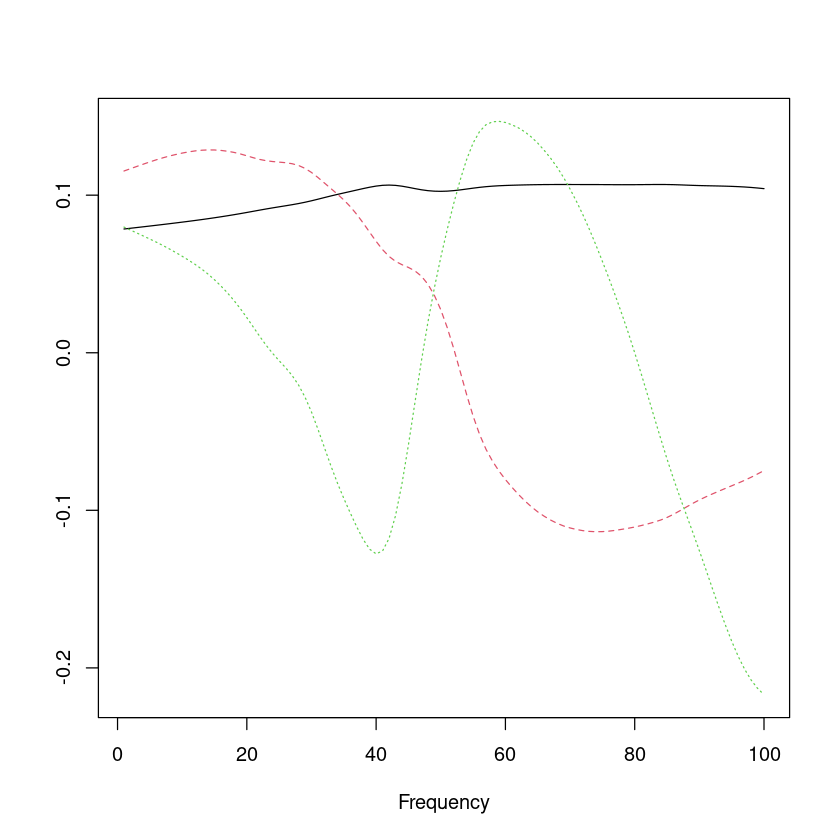

In [12]:
matplot(1:100, meatpca$rot[,1:3], type="l", xlab= "Frequency", ylab="")

In [13]:
model3 = lm(fat ~ meatpca$x[,1:4], meatspec[1:172,])

rmse(model3$fit, meatspec$fat[1:172])

[1] 4.064745

##### PCR

Principal component regression is on example of skrinkage estimation
* PCs represent a linear combination of the 100 predictors as function of the PC axis
* Let's plot 100 slop coefficients for the full least squares fit

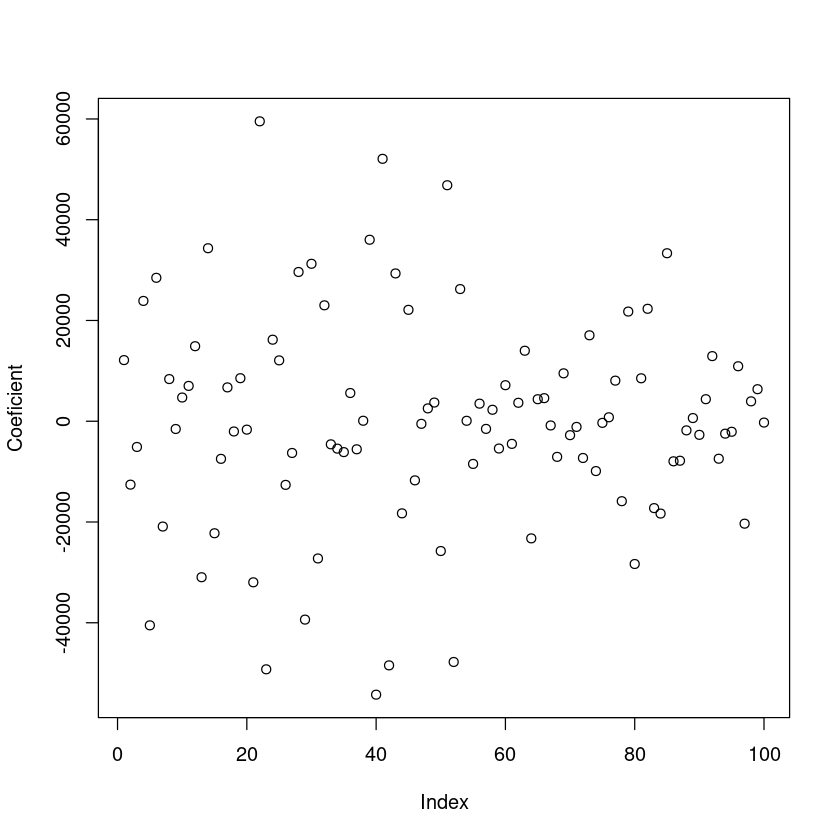

In [16]:
plot(model1$coef[-1], ylab = "Coeficient")

* The PCR basic model is given by $y=Z \gamma+ \epsilon$ which is $y=XU\gamma+ \epsilon$
* Let's compute $XU$


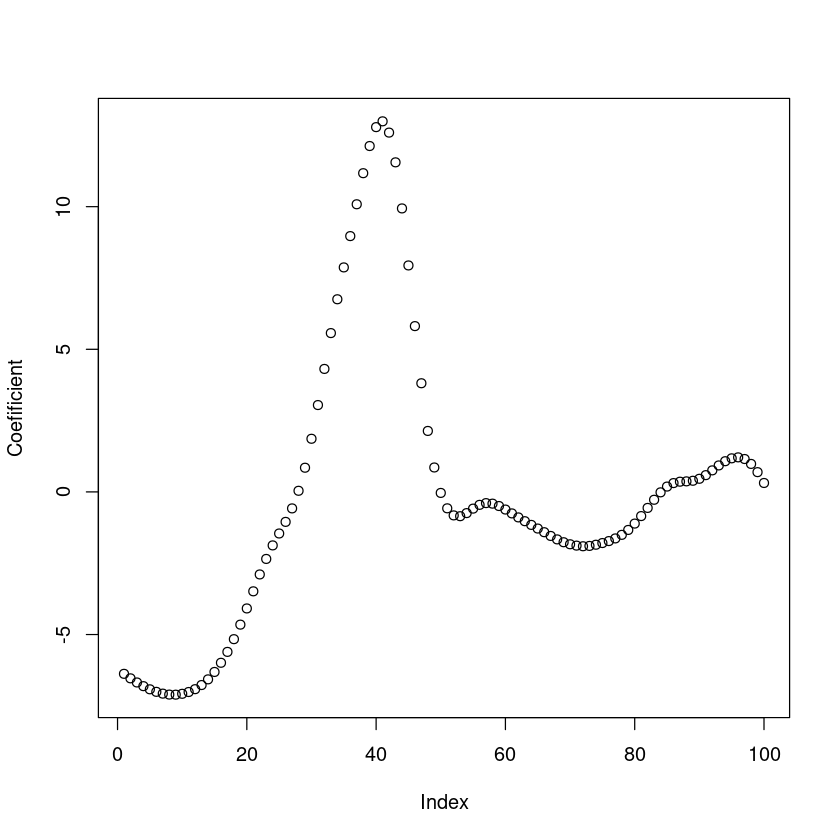

In [17]:
# X*U
svb = meatpca$rot[, 1:4] %*% model3$coef[-1]
plot(svb, ylab = "Coefificient")

* Here, the coefficients are more well behaved and in lower range, that is called shrikage
* The decision about how my PC should be used is based on the how much each PC is capturing from *X*. A good way to evaluate that is by *scree plot* 

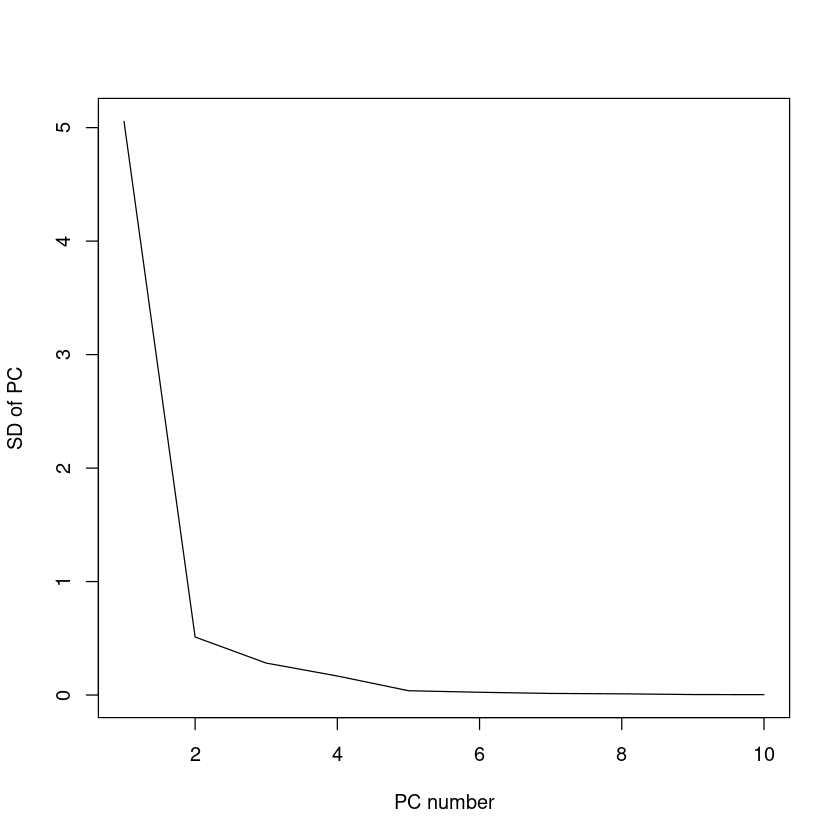

In [19]:
plot(meatpca$sdev[1:10], type= "l", ylab="SD of PC", xlab="PC number")

* The first elbow is at PC2, but there is a second elbow at PC5. Thus we could chose 1 or 4

* Default version of PCs centers predictors so we need to impose the same centering (using the mean of the training sample) on the predictors

In [20]:
mm = apply(meatspec[1:172, -101], 2, mean)
tx = as.matrix(sweep(meatspec[173:215, -101], 2, mm))

* Now let's form the four linear combinations determine by the first four eigenvectors and compute prediction

In [23]:
nx = tx %*% meatpca$rot[,1:4]
pv = cbind(1, nx) %*% model3$coef

In [24]:
# Finding the RMSE on the test data
rmse(pv, meatspec$fat[173:215])

[1] 4.533982

* Not very impressive.Let's loop over the first 50 values to see if we can find a better retention value

[1] 27

[1] 1.854858

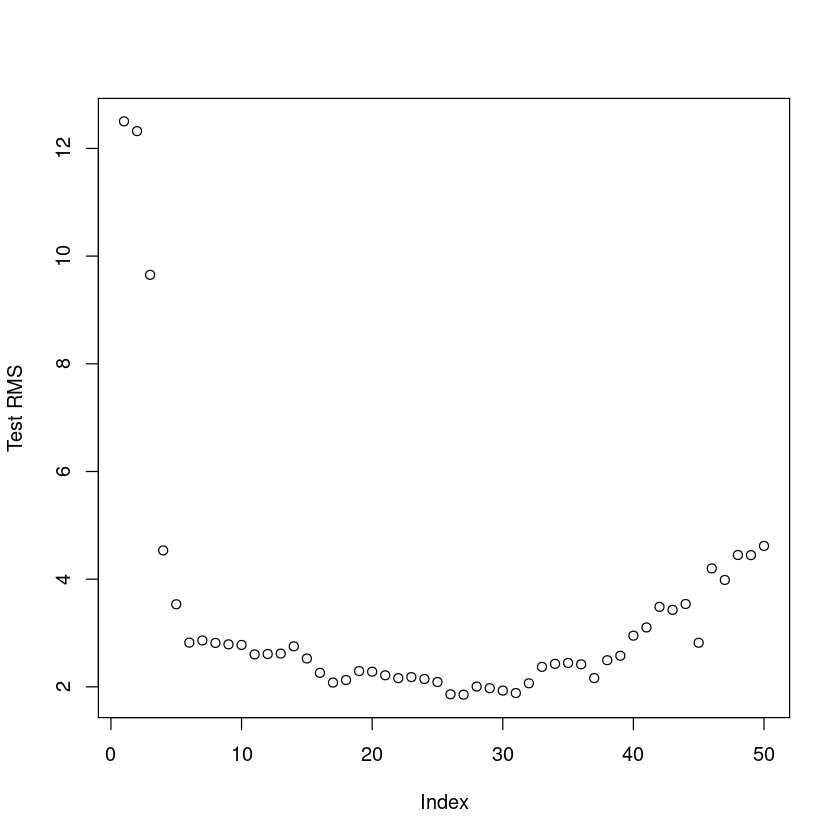

In [61]:
rmsmeat <- numeric(50)
  for (i in 1:50) {
      nx = tx %*% meatpca$rot[,1:i]
      mode13 = lm(fat~meatpca$x[,1:i] , meatspec[1:172,])
      pv = cbind (1, nx) %*% mode13$coef
      rmsmeat[i] = rmse(pv, meatspec$fat[173:215] )
  } 

plot (rmsmeat, ylab="Test RMS")
which.min (rmsmeat)
min (rmsmeat)

* The RMSE plot shows that the best result occurs for 27 PCs for which RMSE is far better than anything test yet
* In practice, I might not have the testing set to estimate RMSE, althought we can always divide our original set. The down load the considerably decrease numbers in the testing set 
* The solution for that is to use **crossvalidation(CV)**
   
   (1) divide data into *m* equal parts. For each part we use the rest of the data as training set and that part as the test set

In [95]:
library(pls)

In [91]:
## NOT WORKING

trainx = as.matrix(sweep(meatspec[1:172, -101], 2, mm))

#x.datset = cbind(trainx,meatspec$fat[1:172] )
#pcrg =  pcr(trainx ~ meatspec$fat[1:172], 1, validation="CV", segments=10)
#plot(pcrg$validat$RMS, ylab="CV RMS", xlab="Number of components")

## Partial Least Squares (PLS)

Is a method for relating a set of input variables $X_1, ..., X_m$ and output $Y_1, ..., Y_l$

* PLS is comparable to PCR in that both predict the response using some umber off linear combination of the predictors
* The main difference is that PLS does not ignores $Y$ in determining the linear combinations

Consider the univariate PLS (l=1)


<p>&nbsp;</p>
\begin{split}
\hat y= \beta_1T_1 + ... + \beta_pT_p
\end{split}
<p>&nbsp;</p>

* Where $T_k$ is the linear combination of the $X_s$ terms. Most algorithms work interactively determing $T_i$ to predict $y$ as well as preserving orthogonality

* As in PCR, we must choose the number of components carefully

    * 1) Select components using CV
    * 2) Center the predictors firt and compute the PLS on all models up to size 50
    * 3) plot linear combination used for a four-component model 

In [ ]:
mm = apply (meatspec[1:172,], 2, mean)
mtc = sweep(meatspec[1:172,],2,mm)
y = meatspec$fat[1:172]
yc = mtc[,101]
trainx = as.matrix(mtc[ ,-101])


mm2 = apply (meatspec[173:215,], 2, mean)
mtc2 = sweep(meatspec[173:215,],2,mm2)
testx = as.matrix(mtc2)[,-101]
yt = mtc2[,101]

In [114]:
library(pls)
plsg  = plsr(fat~.-1,data=mtc,50,validation="LOO")
summary(plsg)
#The validation results here are root mean squared error of prediction (RMSEP).
#CV is the ordinary CV estimate, and adjCV is a bias-corrected
#CV estimate (Mevik and Cederkvist 2004) (For a LOO CV, there is virtually no difference).

#It is often simpler to judge the RMSEPs by plotting them:
plot(RMSEP(plsg),legendpos="topright")

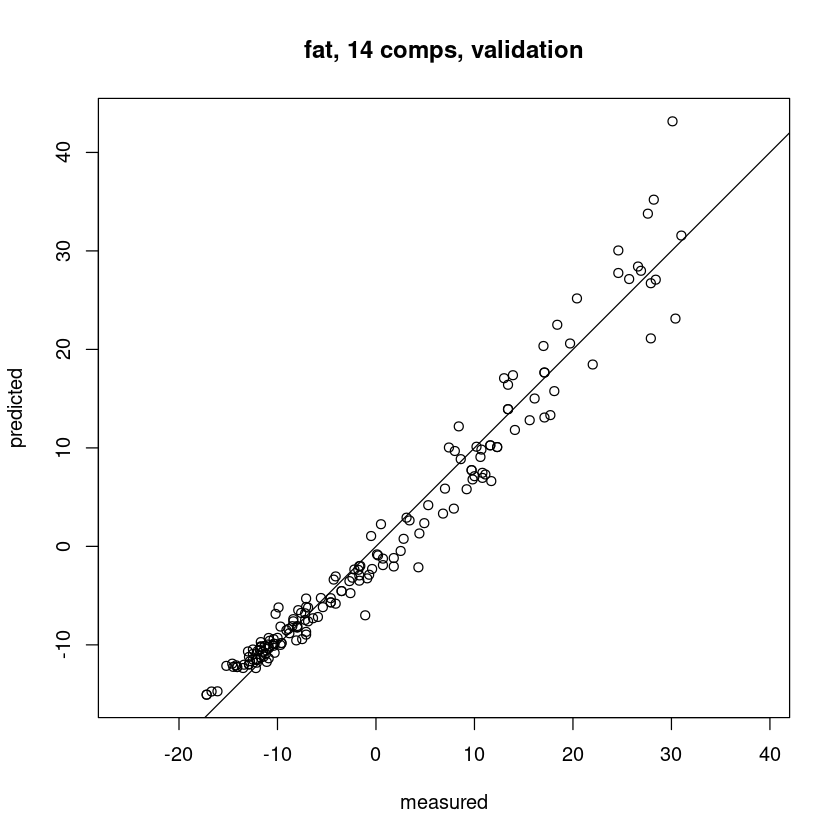

In [104]:
#we need around 14 components as suggested by the
#crossvalidated estimate of the RMSEP
plsg2 <-plsr(fat~.,data=mtc,14,validation="LOO")
plot(plsg2, ncomp =14, asp = 1, line = TRUE)

In [107]:
ypred<-predict(plsg2, ncomp = 14, newdata = mtc)
rmse (ypred,yc)

ytpred<-predict(plsg2, ncomp = 14, newdata = mtc2)
rmse (ytpred,yt)


[1] 1.952796

[1] 2.008597


#### PCR and PLS comparison
* PLS was slightly better than the 2.21 found by the PCR
* PCR and PLS have biggest advantance over OLS when there are lots of variables in relation to the number of cases. They do not require $n \geq p$ 

* PCR finds linear combination of predictors to generate few components that can explain the data. The main purpose in dimension reduction. It only consider X-matrix, thus is often better at explaining than predicting
* PLS finds linear combination of the predictors that best explain the response. Most effective when there are large numbers of variables to be considered; however, it virtually useless for explanation purposes

## Ridge Regression (RR)

Ridge regression makes the assumption that the regression coefficients (after normalization) are not likely to be very large. It is appropriate whe the predictor's matrix is collinear and the OLS estimates of $\beta$ are unstable

Suppose that the predictor have been centered by their means and scaled by their SD, and the response has been centered

<p>&nbsp;</p>
\begin{split}
\hat \beta= (X^TX + \lambda I)^{-1}X^Ty
\end{split}
<p>&nbsp;</p>


RR regression can be approached in two ways:

#### Bayesian point of view
* pior normal distribution of $\beta$: smaller values are mor likely than larger ones 
    - Large values of $\lambda$ corresponde to a belief that the $\beta$ are really quite small, whereas smaller values of $\lambda$ indicates a more relaxed beliefe about $\beta$
  
* $\lambda$ is chosen by automatic methods, but the safiest way it to plot $\hat \beta$ as function of $lambda$


modified HKB estimator is 1.043642e-08 
modified L-W estimator is 0.6998297 
smallest value of GCV  at 1.8e-08 


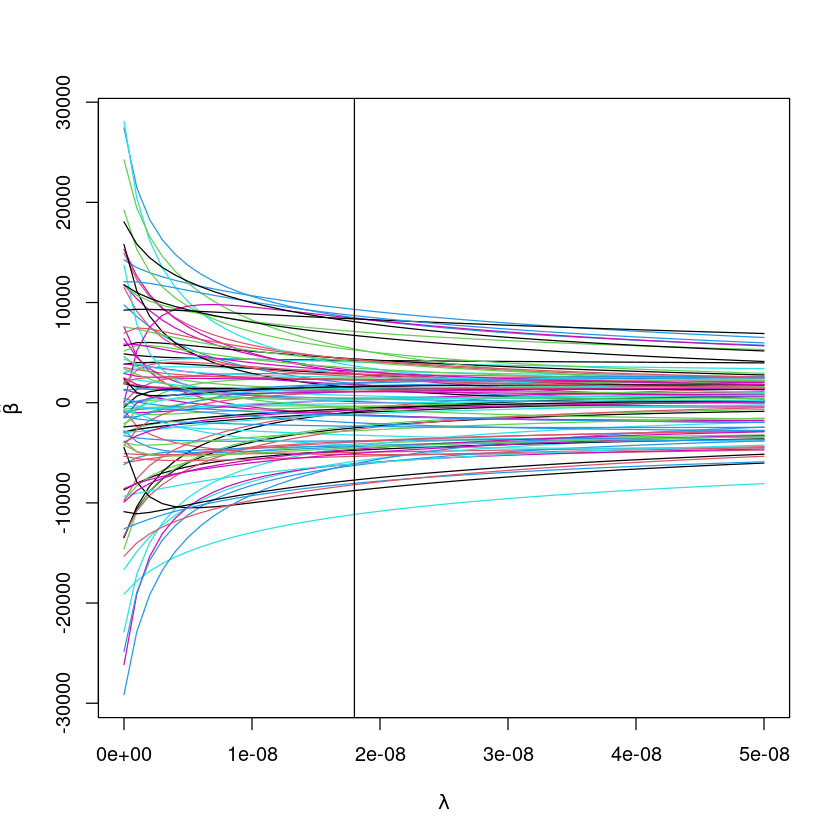

In [112]:
library(MASS)

gridge <-lm.ridge (yc~trainx-1, lambda =seq(0,5e-8,1e-9))
 
matplot (gridge$lambda, t(gridge$coef), type="l",lty=1,xlab=expression (lambda), ylab=expression (hat (beta)))

# Various  automatic selectors of lambda
select(gridge)
abline(v=1.8e-8)

* 1) Compute the training sample performance
* 2) Ridge regression both centers and scales the predictors, we need to do the same in computing the fit
* 3) Add back the mean of the response because of the centering

In [113]:
# Generalized crossvalidation (GCV) 1.8e-8

which.min(gridge$GCV)
ypredg <-scale(trainx, center=FALSE,scale=gridge$scales)%*% gridge$coef[, 19] + mean(meatspec$fat[1:172])
rmse(ypredg,meatspec$fat[1:172])

ytpredg <-scale(testx, center=FALSE, scale=gridge$scales)%*% gridge$coef [, 19] + mean(meatspec$fat[1:172])
rmse (ytpredg, meatspec$fat[173:215])


1.8e-08 
     19

[1] 0.8045392

[1] 3.997833

### Final considerations
Ridge regression of coefficients are biased. The mean-squared error (MSE) cab be decomposed as:

<p>&nbsp;</p>
\begin{split}
E(\hat \beta - \beta)^2 = (E(\hat \beta - \beta))^2 + E(\hat \beta - E \hat \beta)^2
\end{split}
<p>&nbsp;</p>

* MSE of an estimate can be represented as the square of the bias plus the variance
* Large reduction in the variabce may be obtained at the price of an increase in the bias

* Comparing PCR, PLS, and Ridge Regression, the best results come from Ridge Regressions